<a href="https://colab.research.google.com/github/AlexNoonan-Syracuse/Lab9/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

msg = tf.constant('Hello, TensorFlow!')

print(msg)

2.6.0
tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('Rows: %d, columns: %d' % (train_images.shape[0], train_images.shape[1]))

print('Rows: %d, columns: %d' % (test_images.shape[0], test_images.shape[1]))

num_pixels = train_images.shape[1] * train_images.shape[2]
num_classes = test_labels.shape[0]


Rows: 60000, columns: 28
Rows: 10000, columns: 28


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('train images shape: ',train_images.shape)
print('Labels Length:',len(train_labels))
print('Train Labels: ',train_labels)

print('test images: ',test_images.shape )
print('Labels length: ', len(test_labels))


train images shape:  (60000, 28, 28)
Labels Length: 60000
Train Labels:  [9 0 0 ... 3 0 5]
test images:  (10000, 28, 28)
Labels length:  10000


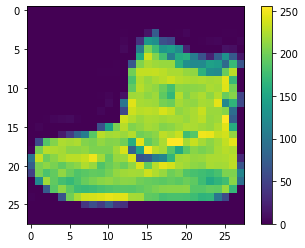

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [5]:
# making the images greyscale

train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)



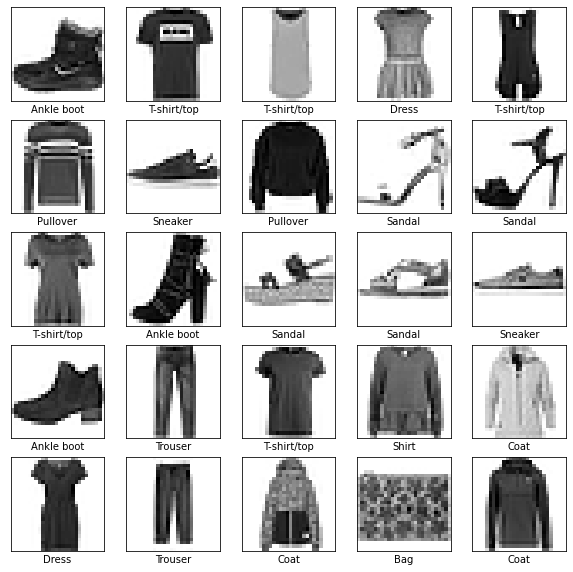

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [7]:
def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    

# Keras model 1: Simple Model

In [11]:
model = Sequential()
model.add(Flatten())
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal' ,activation="relu"))
model.add(Dense(num_classes,kernel_initializer='normal', activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/100
270/270 [==============================] - 6s 21ms/step - loss: 0.6638 - accuracy: 0.8003 - val_loss: 0.4515 - val_accuracy: 0.8428
Epoch 2/100
270/270 [==============================] - 5s 19ms/step - loss: 0.4101 - accuracy: 0.8561 - val_loss: 0.3815 - val_accuracy: 0.8610
Epoch 3/100
270/270 [==============================] - 5s 20ms/step - loss: 0.3731 - accuracy: 0.8682 - val_loss: 0.3842 - val_accuracy: 0.8657
Epoch 4/100
270/270 [==============================] - 5s 20ms/step - loss: 0.3431 - accuracy: 0.8773 - val_loss: 0.3441 - val_accuracy: 0.8757
Epoch 5/100
270/270 [==============================] - 5s 20ms/step - loss: 0.3128 - accuracy: 0.8865 - val_loss: 0.3239 - val_accuracy: 0.8792
Epoch 6/100
270/270 [==============================] - 5s 19ms/step - loss: 0.2964 - accuracy: 0.8927 - val_loss: 0.3423 - val_accuracy: 0.8777
Epoch 7/100
270/270 [==============================] - 5s 20ms/step - loss: 0.2772 - accuracy: 0.9002 - val_loss: 0.3396 - val_accuracy:

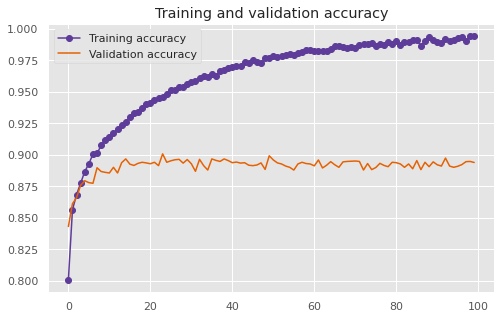

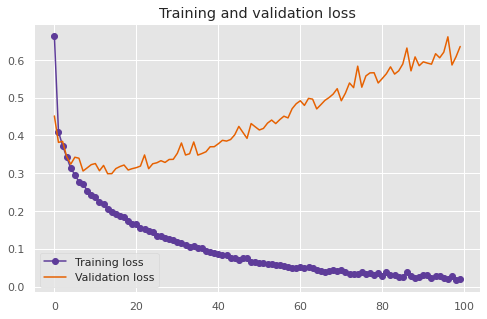

In [51]:
train_labels = utils.to_categorical(train_labels ,num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

history = model.fit(train_images, train_labels, batch_size=200, epochs=100, verbose=1, validation_split=0.1)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

print('\nTest Loss:',test_loss)
print('\nTest accuracy:', test_acc)
plot_train_curve(history)

# Keras Model 2: Complex Model


In [8]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(num_pixels, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(num_classes, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100
270/270 [==============================] - 37s 29ms/step - loss: 0.9224 - accuracy: 0.7589 - val_loss: 0.4024 - val_accuracy: 0.8613
Epoch 2/100
270/270 [==============================] - 7s 27ms/step - loss: 0.3740 - accuracy: 0.8682 - val_loss: 0.3530 - val_accuracy: 0.8730
Epoch 3/100
270/270 [==============================] - 8s 28ms/step - loss: 0.3293 - accuracy: 0.8833 - val_loss: 0.3259 - val_accuracy: 0.8842
Epoch 4/100
270/270 [==============================] - 7s 27ms/step - loss: 0.2987 - accuracy: 0.8949 - val_loss: 0.3047 - val_accuracy: 0.8908
Epoch 5/100
270/270 [==============================] - 8s 28ms/step - loss: 0.2766 - accuracy: 0.9009 - val_loss: 0.2858 - val_accuracy: 0.9015
Epoch 6/100
270/270 [==============================] - 8s 28ms/step - loss: 0.2576 - accuracy: 0.9077 - val_loss: 0.2878 - val_accuracy: 0.9005
Epoch 7/100
270/270 [==============================] - 7s 27ms/step - loss: 0.2406 - accuracy: 0.9133 - val_loss: 0.2626 - val_accuracy

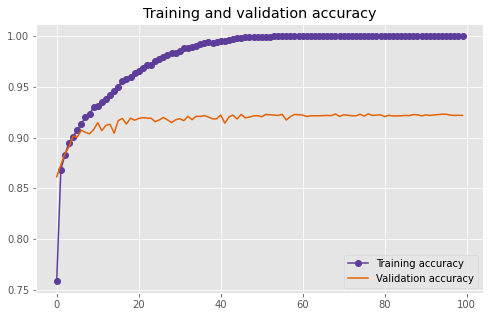

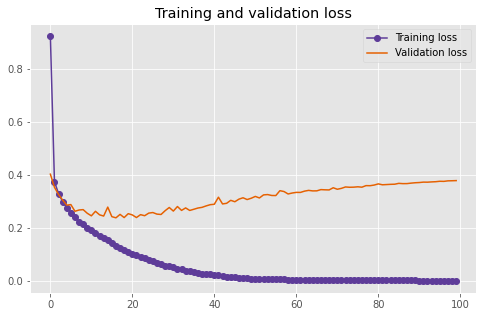

In [9]:
train_labels = utils.to_categorical(train_labels ,num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

history2 = model2.fit(train_images, train_labels, batch_size=200, epochs=100, verbose=1, validation_split=0.1)
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=0)

print('\nTest Loss:',test_loss)
print('\nTest accuracy:', test_acc)
plot_train_curve(history2)

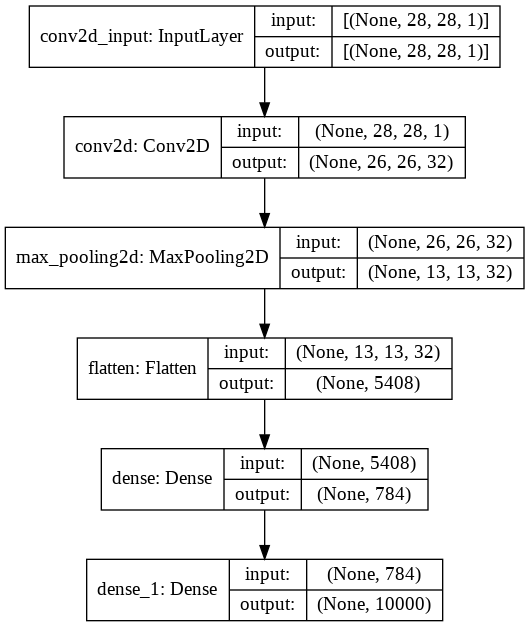

In [10]:
keras.utils.plot_model(model2, show_shapes=True)

# Naive Bayes Classifier


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage.transform import pyramid_gaussian
from sklearn.model_selection import train_test_split

In [43]:
# confusion matrix to measure models accuracy for each clothing item
def confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    acc = accuracy_score(ytest, yhat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")

In [42]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

num_pixels = train_images.shape[1] * train_images.shape[2]
num_classes = test_labels.shape[0]
print('Rows: %d, columns: %d' % (train_images.shape[0], train_images.shape[1]))

print('Rows: %d, columns: %d' % (test_images.shape[0], test_images.shape[1]))


print('Pixels: ',num_pixels)
print('Classes: ', num_classes)

Rows: 60000, columns: 28
Rows: 10000, columns: 28
Pixels:  784
Classes:  10000


In [28]:
train_images = train_images.reshape(train_images.shape[0], 28*28)
test_images = test_images.reshape(test_images.shape[0], 28*28)

Sum Axis-1 as Classification accuracy: 0.5856


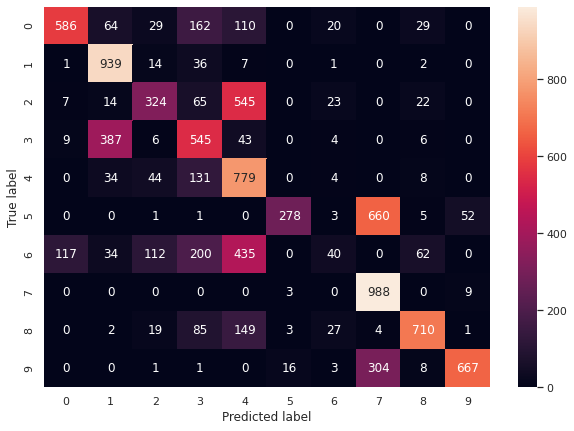

In [41]:
# test/fitting and measuring accuracy of model
model3 = GaussianNB()
model3.fit(train_images, train_labels)
yhat = model3.predict(test_images)

confusionmatrix(test_labels, yhat)

